<a href="https://colab.research.google.com/github/pandu1992/PraktikumDataScience/blob/main/AI_Practicum_3_1_and_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
  inflating: /content/intel-image-classification-master/results/predictions/forest/9661.jpg  
  inflating: /content/intel-image-classification-master/results/predictions/forest/9677.jpg  
  inflating: /content/intel-image-classification-master/results/predictions/forest/9697.jpg  
  inflating: /content/intel-image-classification-master/results/predictions/forest/9700.jpg  
  inflating: /content/intel-image-classification-master/results/predictions/forest/983.jpg  
  inflating: /content/intel-image-classification-master/results/predictions/forest/9837.jpg  
  inflating: /content/intel-image-classification-master/results/predictions/forest/9854.jpg  
  inflating: /content/intel-image-classification-master/results/predictions/forest/9858.jpg  
  inflating: /content/intel-image-classification-master/results/predictions/forest/99.jpg  
  inflating: /content/intel-image-classification-master/results/predictions/forest/9939.jpg  
  inflating:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,912,582 (72.15 MB)

 Trainable params: 4,197,894 (16.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 140s 296ms/step - accuracy: 0.6570 - loss: 0.9929 - val_accuracy: 0.8053 - val_loss: 0.5041
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 118s 268ms/step - accuracy: 0.7778 - loss: 0.5840 - val_accuracy: 0.8263 - val_loss: 0.4684
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 140s 265ms/step - accuracy: 0.7994 - loss: 0.5336 - val_accuracy: 0.8337 - val_loss: 0.4414
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 115s 262ms/step - accuracy: 0.8119 - loss: 0.5056 - val_accuracy: 0.8337 - val_loss: 0.4495
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 143s 265ms/step - accuracy: 0.8119 - loss: 0.4996 - val_accuracy: 0.8227 - val_loss: 0.4677
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 117s 267ms/step - accuracy: 0.8171 - loss: 0.4889 - val_accuracy: 0.8310 - val_loss: 0.4390
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 115s 262ms/step - accuracy: 0.8177 - loss: 0.4870 - val_accuracy: 0.8407 - val_loss: 0.4260
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 116s 264ms/step - accuracy: 0.8253 -

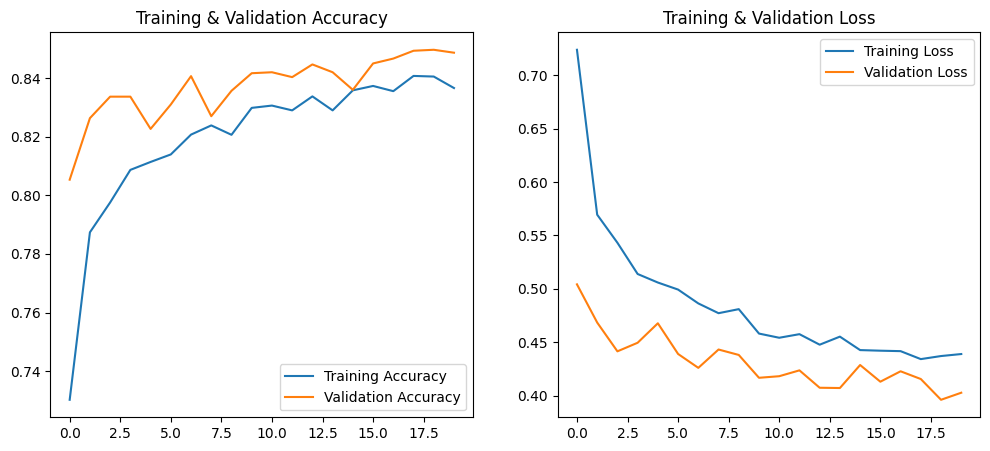

Model saved successfully!


In [1]:
# --- Step 1: Setup Environment and Download Dataset ---
!wget https://github.com/luangtatipsy/intel-image-classification/archive/refs/heads/master.zip -O intel-image-classification.zip
!unzip intel-image-classification.zip -d /content/

# --- Step 2: Data Preparation & Augmentation ---
train_dir = '/content/intel-image-classification-master/datasets/seg_train'
test_dir = '/content/intel-image-classification-master/datasets/seg_test'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load Data
train_data = datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
test_data = datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

# --- Step 3: Model Building with Transfer Learning (VGG16) ---
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load pre-trained VGG16 model
base_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the pre-trained model

# Build the model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # 6 classes sesuai dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --- Step 4: Model Training with Early Stopping ---
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_data,
    epochs=20,
    validation_data=test_data,
    callbacks=[early_stopping]
)

# --- Step 5: Evaluation & Visualization ---
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

# --- Step 6: Save the Model ---
model.save('/content/vgg16_intel_image_classification.h5')
print("Model saved successfully!")

In [2]:
# --- Step 7: Load Model dan Mapping Class ---
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Load model yang sudah disimpan
model = tf.keras.models.load_model('/content/vgg16_intel_image_classification.h5')
print("Model loaded successfully!")

# Mapping class
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

Model loaded successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


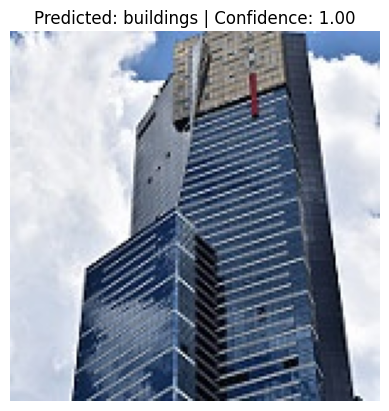

In [7]:
# Contoh gambar dari test set
img_path = test_dir + '/buildings/20057.jpg'  # Sesuaikan dengan lokasi gambar
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img) / 255.0
img_tensor = np.expand_dims(img_tensor, axis=0)

# Predict
prediction = model.predict(img_tensor)
predicted_class = class_names[np.argmax(prediction)]
confidence = float(np.max(prediction))

# Visualisasi
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} | Confidence: {confidence:.2f}")
plt.axis('off')
plt.show()